In [ ]:
!pip install -q roboflow ultralytics pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.7 MB/s eta 0:00:00


In [ ]:
import os
import glob

from IPython.display import Image, HTML, display
from pytube import YouTube
from base64 import b64encode

from roboflow import Roboflow
from google.colab import userdata
import ultralytics

In [ ]:
!nvidia-smi

Fri Jul  5 13:08:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pwd

/content


In [ ]:
!mkdir {HOME}/datasets

In [ ]:
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pwd

/content/datasets


In [ ]:
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("objet-detect-yolov5").project("eep_detection-u9bbd")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EEP_Detection-1 in yolov5pytorch:: 100%|██████████| 6482/6482 [00:00<00:00, 6909.72it/s]


In [ ]:
%cd {dataset.location}

/content/datasets/EEP_Detection-1


# Train the dataset

In [ ]:
%cd {HOME}

/content


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/EEP_Detection-1/data.yaml epochs=90 imgsz=640

Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/EEP_Detection-1/data.yaml, epochs=90, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1720185130.4d38a6a3fcb4.1903.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch11360.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch11361.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch11362.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


# Display the confusion matrix

/content


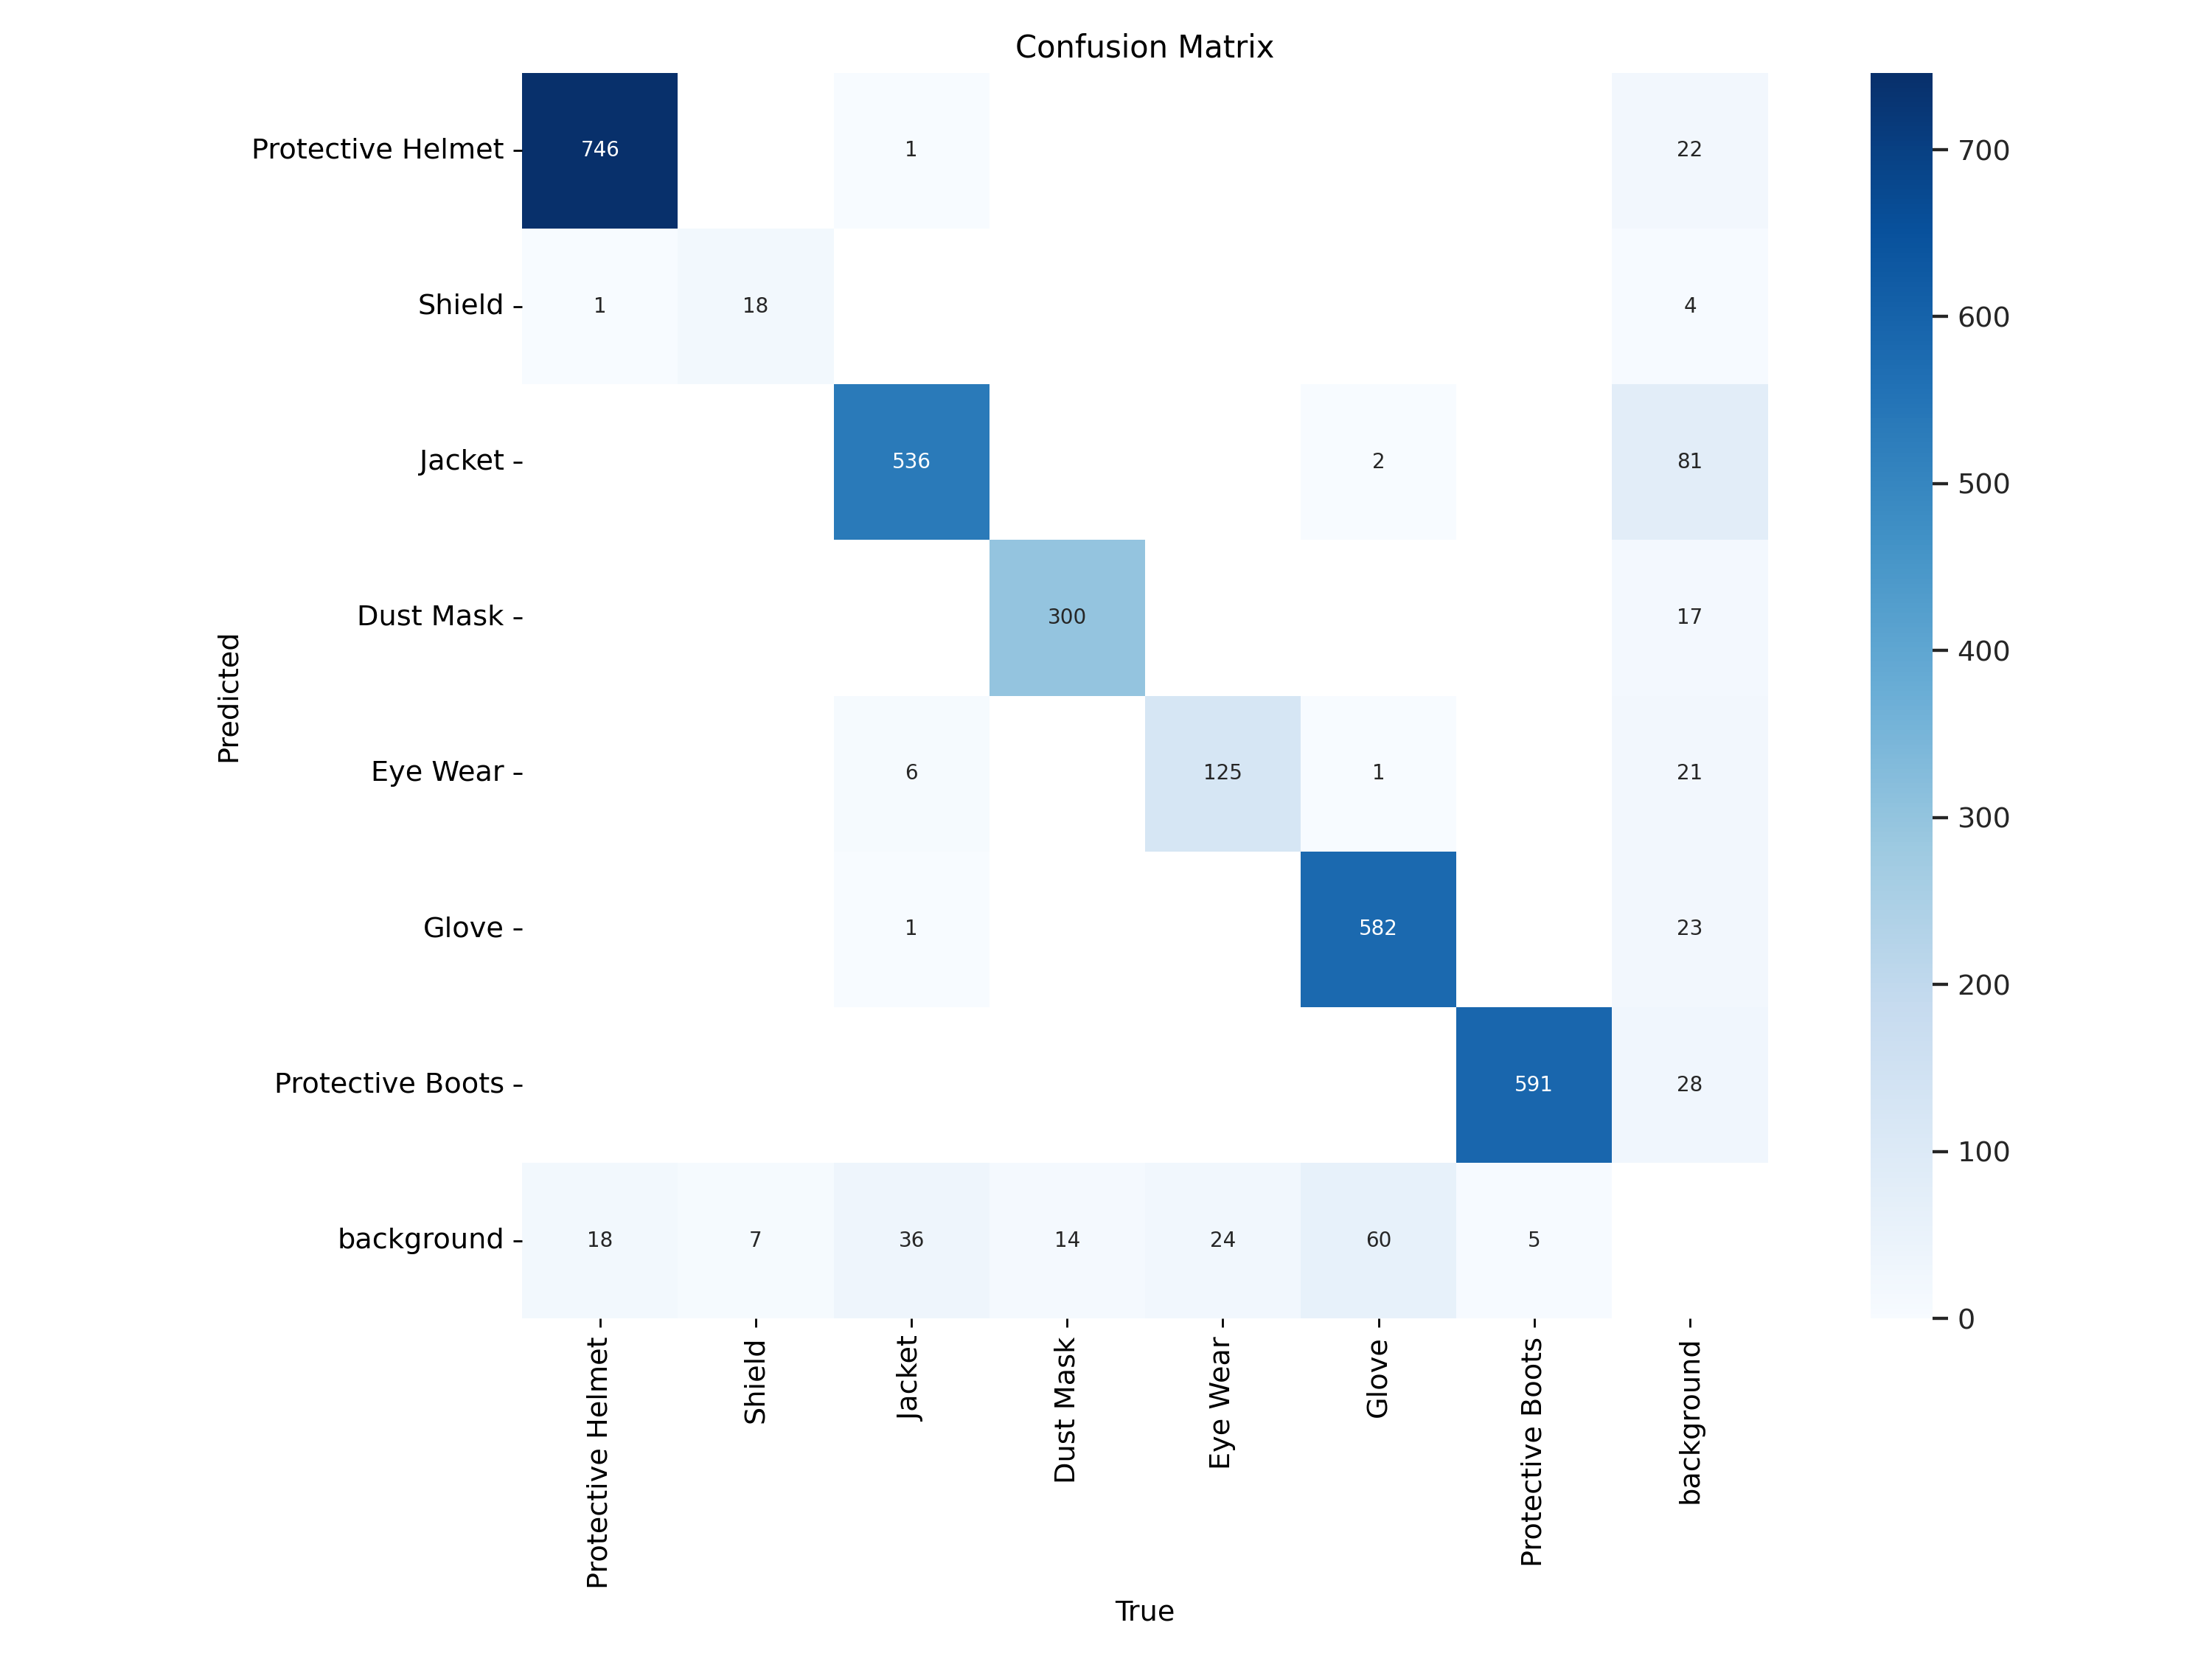

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

/content


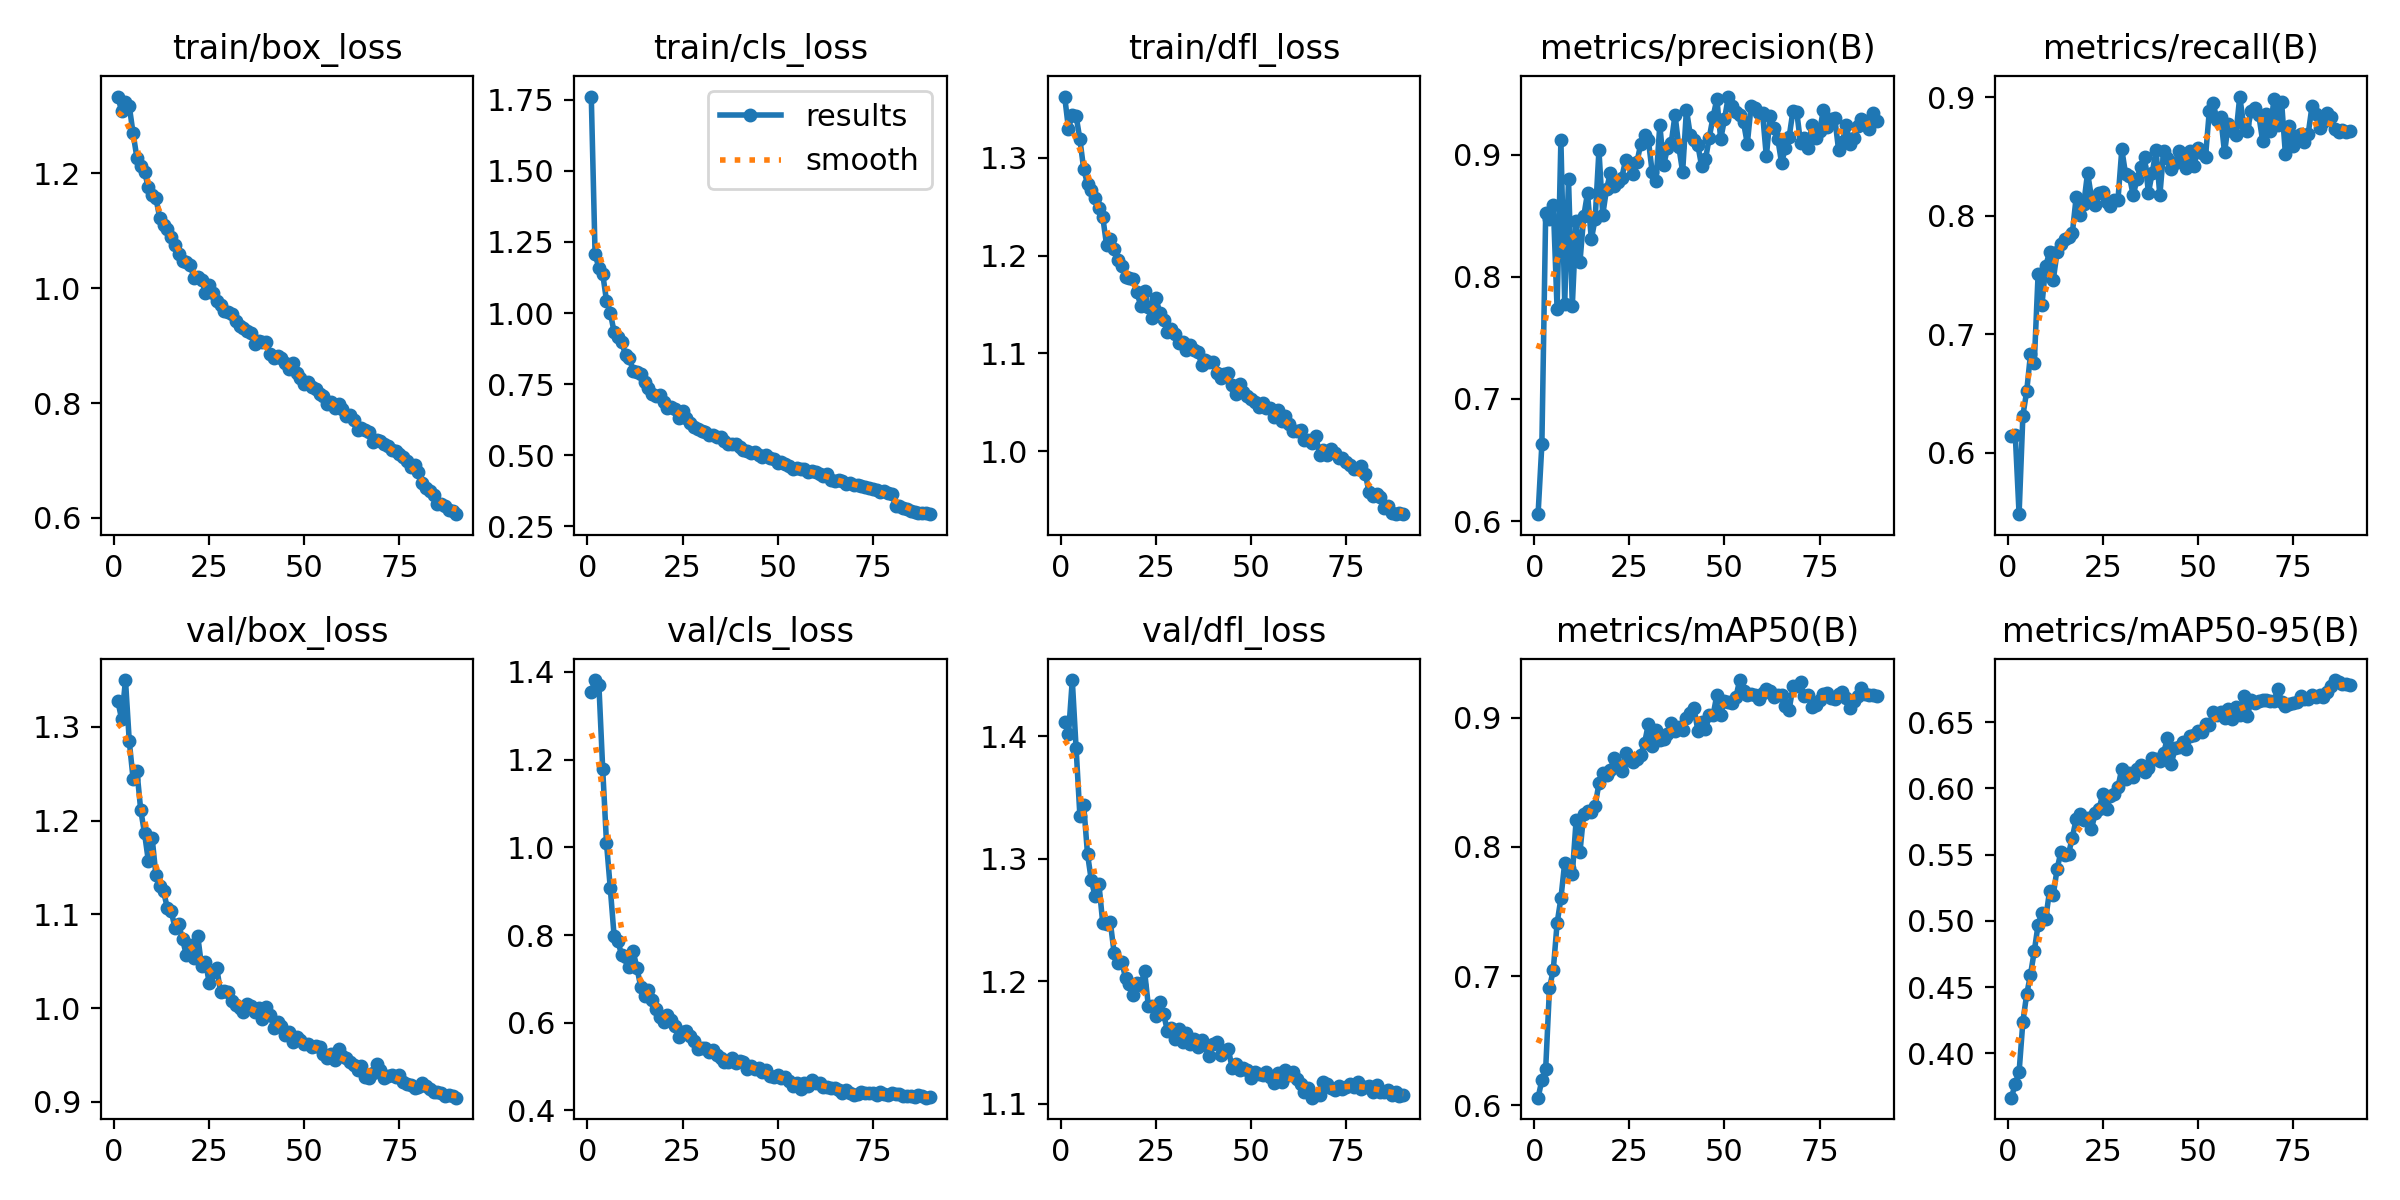

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


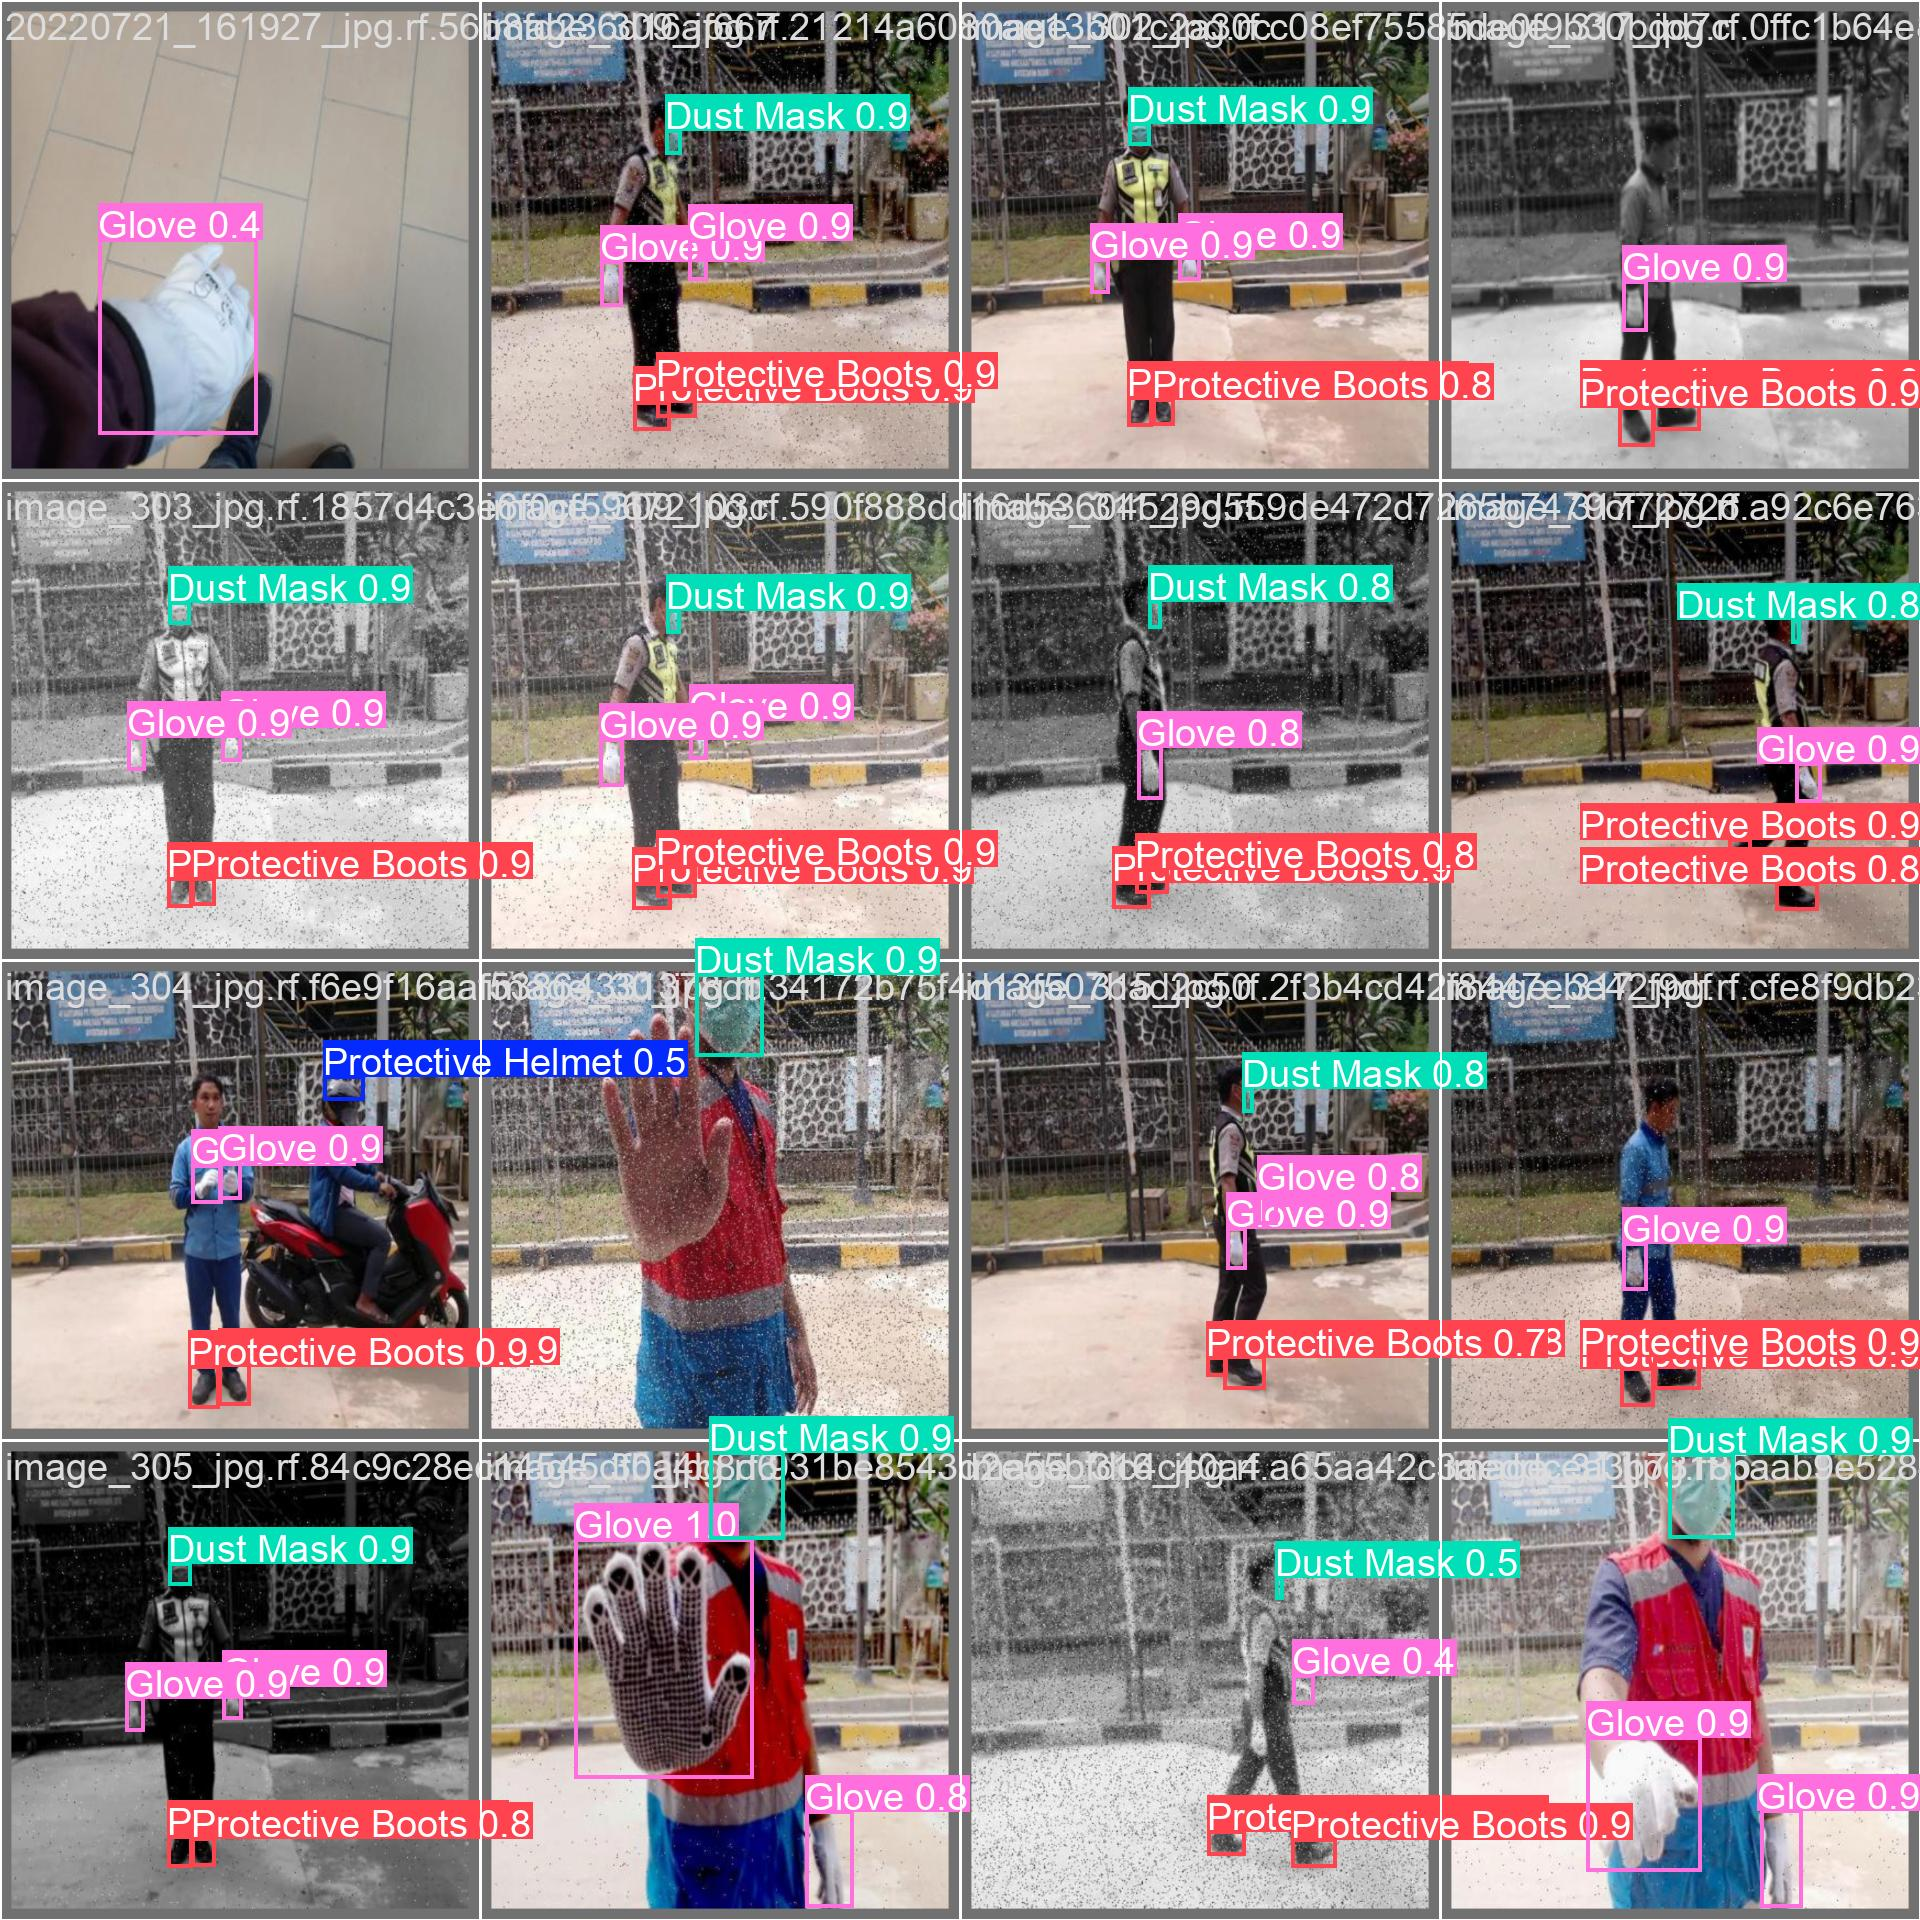

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validation

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/EEP_Detection-1/data.yaml

/content
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/EEP_Detection-1/valid/labels.cache... 647 images, 0 backgrounds, 0 corrupt: 100% 647/647 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:21<00:00,  1.90it/s]
                   all        647       3074      0.929      0.873      0.923      0.681
     Protective Helmet        408        765      0.981       0.96      0.988        0.8
                Shield         25         25      0.788       0.64      0.743      0.473
                Jacket        361        580       0.92      0.898       0.94      0.753
             Dust Mask        304        314      0.983       0.94      0.973      0.728
              Eye Wear        148        149      0.879      0.812      0.872      0.533
                 Glove   

# Test

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/EEP_Detection-1/data.yaml conf=0.25 source=/content/datasets/EEP_Detection-1/test/images

/content
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs

image 1/324 /content/datasets/EEP_Detection-1/test/images/000446_jpg.rf.ae946a1122b8eaac534a4954f07b3755.jpg: 640x640 2 Protective Helmets, 2 Gloves, 36.5ms
image 2/324 /content/datasets/EEP_Detection-1/test/images/20220721_161946_jpg.rf.149c26cf563aa2ace0bdc099c4af8fef.jpg: 640x640 (no detections), 36.3ms
image 3/324 /content/datasets/EEP_Detection-1/test/images/20220721_162015_jpg.rf.f71cba1429b26a3c95b6f8706ea69853.jpg: 640x640 1 Dust Mask, 36.3ms
image 4/324 /content/datasets/EEP_Detection-1/test/images/20220721_162036_jpg.rf.f6b8fdbdef55ce36cd4ad61549b2c1e2.jpg: 640x640 1 Dust Mask, 36.3ms
image 5/324 /content/datasets/EEP_Detection-1/test/images/20220721_162308_jpg.rf.32a4cbe5e0f3e1bc5159596a1bbb833d.jpg: 640x640 1 Eye Wear, 36.2ms
image 6/324 /content/datasets/EEP_Detection-1/test/images/20220721_162435_

# Visualize predictions

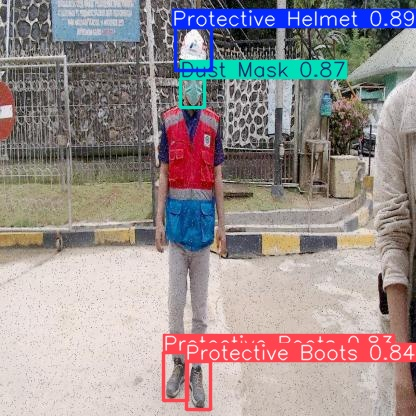

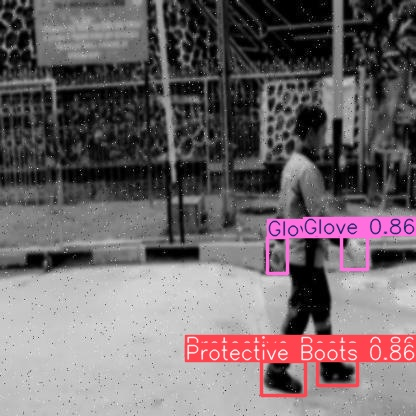

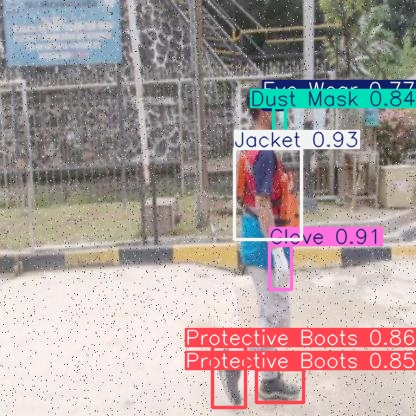

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[0:3]:
  display(Image(filename=image_path, width=600))
  print('\n')

# Demo videos

In [ ]:
def download_youtube(link):
  youtube = YouTube(link)

  print(youtube.title)

  video = youtube.streams.get_highest_resolution()
  video.download()

  return video

In [ ]:
!mkdir {HOME}/videos

In [ ]:
%cd {HOME}/videos

LINKS = [
    'https://www.youtube.com/watch?v=NV2cNmfK8_Y',
    'https://www.youtube.com/watch?v=XVNMj0ZxZsI',
    'https://www.youtube.com/watch?v=rGRt4UBhuwY'
]

demo_video_1 = download_youtube(LINKS[0])
demo_video_2 = download_youtube(LINKS[1])
demo_video_3 = download_youtube(LINKS[2])

os.rename(demo_video_1.default_filename, 'demo_video_1.mp4')
os.rename(demo_video_2.default_filename, 'demo_video_2.mp4')
os.rename(demo_video_3.default_filename, 'demo_video_3.mp4')

/content/videos
Personal Protective Equipment (PPE): An Overview of the Basics | Your ACSA Safety Training
Safety Toolbox Talks: Personal Protective Equipment (PPE)
Types of Personal Protective Equipment (PPE) - Safety Training


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/EEP_Detection-1/data.yaml conf=0.25 source={HOME}/videos/demo_video_1.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 22679/27675) /content/videos/demo_video_1.mp4: 384x640 (no detections), 13.6ms
video 1/1 (frame 22680/27675) /content/videos/demo_video_1.mp4: 384x640 (no detections), 14.3ms
video 1/1 (frame 22681/27675) /content/videos/demo_video_1.mp4: 384x640 (no detections), 17.1ms
video 1/1 (frame 22682/27675) /content/videos/demo_video_1.mp4: 384x640 (no detections), 17.3ms
video 1/1 (frame 22683/27675) /content/videos/demo_video_1.mp4: 384x640 (no detections), 15.2ms
video 1/1 (frame 22684/27675) /content/videos/demo_video_1.mp4: 384x640 (no detections), 12.9ms
video 1/1 (frame 22685/27675) /content/videos/demo_video_1.mp4: 384x640 (no detections), 13.6ms
video 1/1 (frame 22686/27675) /content/videos/demo_video_1.mp4: 384x640 (no detections), 14.0ms
video 1/1 (frame 22687/27675) /content/videos/demo_video_1.mp4: 384x640 (no detections), 14.6ms
video 1/1 (frame 22688/27675) /content/videos/demo_video_1.mp4: 384x640 (no detection

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/EEP_Detection-1/data.yaml conf=0.25 source={HOME}/videos/demo_video_2.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 5119/10115) /content/videos/demo_video_2.mp4: 384x640 (no detections), 12.1ms
video 1/1 (frame 5120/10115) /content/videos/demo_video_2.mp4: 384x640 (no detections), 12.2ms
video 1/1 (frame 5121/10115) /content/videos/demo_video_2.mp4: 384x640 (no detections), 12.2ms
video 1/1 (frame 5122/10115) /content/videos/demo_video_2.mp4: 384x640 1 Dust Mask, 12.2ms
video 1/1 (frame 5123/10115) /content/videos/demo_video_2.mp4: 384x640 (no detections), 12.1ms
video 1/1 (frame 5124/10115) /content/videos/demo_video_2.mp4: 384x640 (no detections), 12.0ms
video 1/1 (frame 5125/10115) /content/videos/demo_video_2.mp4: 384x640 (no detections), 11.9ms
video 1/1 (frame 5126/10115) /content/videos/demo_video_2.mp4: 384x640 (no detections), 12.0ms
video 1/1 (frame 5127/10115) /content/videos/demo_video_2.mp4: 384x640 (no detections), 12.2ms
video 1/1 (frame 5128/10115) /content/videos/demo_video_2.mp4: 384x640 (no detections), 12.6ms
vid

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/EEP_Detection-1/data.yaml conf=0.25 source={HOME}/videos/demo_video_3.mp4

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 9529/14525) /content/videos/demo_video_3.mp4: 384x640 (no detections), 13.7ms
video 1/1 (frame 9530/14525) /content/videos/demo_video_3.mp4: 384x640 (no detections), 14.0ms
video 1/1 (frame 9531/14525) /content/videos/demo_video_3.mp4: 384x640 (no detections), 14.3ms
video 1/1 (frame 9532/14525) /content/videos/demo_video_3.mp4: 384x640 (no detections), 14.3ms
video 1/1 (frame 9533/14525) /content/videos/demo_video_3.mp4: 384x640 (no detections), 14.3ms
video 1/1 (frame 9534/14525) /content/videos/demo_video_3.mp4: 384x640 (no detections), 14.0ms
video 1/1 (frame 9535/14525) /content/videos/demo_video_3.mp4: 384x640 (no detections), 14.3ms
video 1/1 (frame 9536/14525) /content/videos/demo_video_3.mp4: 384x640 (no detections), 14.4ms
video 1/1 (frame 9537/14525) /content/videos/demo_video_3.mp4: 384x640 (no detections), 14.3ms
video 1/1 (frame 9538/14525) /content/videos/demo_video_3.mp4: 384x640 (no detections), 15.8ms

# Show results

In [ ]:
!mkdir {HOME}/results

In [ ]:
def show_video(save_path, compressed_path):
  os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")
  mp4 = open(compressed_path, 'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
    <video width=400 controls>
      <source src="%s" type="video/mp4">
    </video>
  """ % data_url)

In [ ]:
show_video(f"{HOME}/runs/detect/predict2/demo_video_1.avi",
           f"{HOME}/results/result_video_1.mp4")

In [ ]:
show_video(f"{HOME}/runs/detect/predict3/demo_video_2.avi",
           f"{HOME}/results/result_video_2.mp4")

In [ ]:
show_video(f"{HOME}/runs/detect/predict4/demo_video_3.avi",
           f"{HOME}/results/result_video_3.mp4")

# Thanks!